In [5]:
import pandas 
dt = pandas.read_csv('Rainfall_data.csv')

In [6]:
dt

,Index,Temperature,Humidity%,Rain
0,0,34,74.2,Yes
1,1,19,68.2,No
2,2,28,67.2,Yes
3,3,29,66.6,Yes
4,4,26,57.9,Yes
...,...,...,...,...
19995,19995,30,77.9,Yes
19996,19996,20,74.8,Yes
19997,19997,14,69.4,No
19998,19998,20,60.6,No


In [12]:
from sklearn.model_selection import train_test_split
Inp = dt.drop(columns=['Index','Rain'])
Out = dt['Rain']

inp_X, tst_X,out_Y, tst_Y = train_test_split(Inp, Out,test_size = 0.05)

In [13]:
from sklearn.tree import DecisionTreeClassifier
CModel = DecisionTreeClassifier()
CModel.fit(inp_X, out_Y)

DecisionTreeClassifier()

In [15]:
CModel.predict([ [33,70] ,
                 [20,55] ])

array(['Yes', 'No'], dtype=object)

In [16]:
pred_Y = CModel.predict(tst_X)

In [18]:
cmp = pandas.DataFrame({'Actual Values':tst_Y.values,
                       'Predicted Values': pred_Y.flatten()})
cmp

,Actual Values,Predicted Values
0,Yes,Yes
1,Yes,No
2,No,Yes
3,No,No
4,Yes,Yes
...,...,...
995,Yes,Yes
996,Yes,No
997,Yes,Yes
998,Yes,No


In [19]:
from sklearn.preprocessing import LabelEncoder
RainEnc = LabelEncoder()
RainEnc.fit(['Yes','No'])

LabelEncoder()

In [20]:
cmp['Actual Values'] = RainEnc.transform(cmp['Actual Values'])
cmp['Predicted Values'] = RainEnc.transform(cmp['Predicted Values'])

<AxesSubplot:ylabel='Density'>

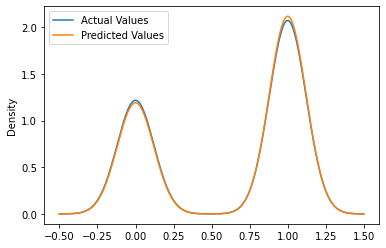

In [22]:
cmp.plot(kind = 'density')

In [25]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(tst_Y, pred_Y)*100
print("Accuracy of the model: ",acc, '%')

Accuracy of the model:  89.8 %
